In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def load_simulation_data(M, T, rho, simJob):
    return np.load("../results-longrun-nohist/argon-M-%d-T-%.2f-rho-%.2f-simjob-%d.npz" % (M,T,rho,simJob))

Ms = [6]
Ts = np.linspace(0.25, 4.0, 16)
rhos = np.concatenate((np.array([0.02, 0.05]), np.linspace(0.1, 2.0, 20)))
simJobs = [0]

In [4]:
gasData = load_simulation_data(6, 3.0, 0.3, 0)
liqData = load_simulation_data(6, 1.0, 0.8, 0)
solData = load_simulation_data(6, 0.5, 1.2, 0)

In [5]:
print(gasData.keys())
Lgas = np.power(gasData["n"]/gasData["rho"], 1/3)
Lliq = np.power(liqData["n"]/liqData["rho"], 1/3)
Lsol = np.power(solData["n"]/solData["rho"], 1/3)
print(Lgas)
print(Lliq)
print(Lsol)

['distHistBinSize', 'diffusion_distance', 'h', 'kinetic_energy', 'desiredT', 'pressure', 'rho', 'autocorrelation', 'equilibrationTime', 'simulationTime', 'n', 'cv', 'correlation_function', 'temperature', 'M', 'potential_energy', 'diffusion_ballistic_velocitysq', 'virial', 'distHistBins']
14.227573218
10.2598556801
8.96280949311


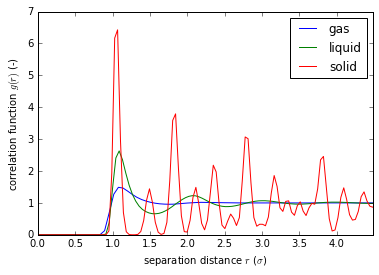

In [6]:
plt.plot(gasData["correlation_function"][0], gasData["correlation_function"][1], label="gas")
plt.plot(liqData["correlation_function"][0], liqData["correlation_function"][1], label="liquid")
plt.plot(solData["correlation_function"][0], solData["correlation_function"][1], label="solid")
plt.xlim(0,Lsol/2)

plt.xlabel("separation distance $r$ ($\sigma$)")
plt.ylabel("correlation function $g(r)$ (-)")
plt.legend()

plt.savefig("longrun/correlation-function.png", dpi=300)